In [4]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")

_set_env("OPENAI_API_KEY")

In [7]:
import datetime
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

def shop_opening_hours() -> str:
    "The shop's opening hours are:"
    schedule = """Monday: 10am-8pm
                    Tuesday: 10am-8pm
                    Wednesday: 10am-8pm
                    Thursday: 10am-8pm
                    Friday: 10am-8pm
                    Saturday: 10am-8pm
                    Sunday: 10am-8pm"""
    return schedule

def get_current_time() -> datetime:
    "Gets the current date and time"
    return datetime.datetime.now()

tools = [shop_opening_hours, get_current_time]

llm_with_tools = llm.bind_tools(tools)

In [8]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant who is responsible for determining whether a shop is open or closed based on the current date and time.")

def assistant(state: MessagesState): 
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

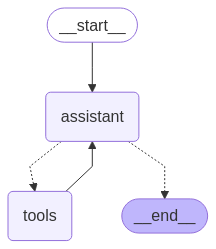

In [9]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition)
builder.add_edge("tools", "assistant")

react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage 

messages = [HumanMessage(content="Is the shop open now?")]
messages = react_graph.invoke({"messages": messages})

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Is the shop open now?
================================== Ai Message ==================================
Tool Calls:
  shopOpeningHours (call_InUKMsnODhlfsysw1Szu3uom)
 Call ID: call_InUKMsnODhlfsysw1Szu3uom
  Args:
  getCurrentTime (call_2VD7yKKozckX8Pd7g0wDDM30)
 Call ID: call_2VD7yKKozckX8Pd7g0wDDM30
  Args:
================================= Tool Message =================================
Name: shopOpeningHours

Monday: 10-8
                    Tuesday: 10-8
                    Wednesday: 10-8
                    Thursday: 10-8
                    Friday: 10-8
                    Saturday: 10-8
                    Sunday: 10-8
================================= Tool Message =================================
Name: getCurrentTime

2025-04-30 18:16:08.032682
================================== Ai Message ==================================

The current time is 18:16 on Wednesday, April 30, 2025. The shop's open